In [1]:
from numpy.random import seed
seed(1)

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
data = pd.read_csv("D:/sem_4_project_material/twitter_dataset.csv",encoding="latin-1",names= ["target","id","date","flag","user","text"])

In [4]:
data.shape

(1600000, 6)

In [5]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
# remove columns which is not required
data=data.drop(['id', 'date', 'flag', 'user'], axis=1)

In [7]:
data.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
data["target"].value_counts()

4    800000
0    800000
Name: target, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [11]:
data["target"]=data["target"].map(lambda x : 1 if x == 4 else 0 )

In [12]:
data.target.value_counts()

1    800000
0    800000
Name: target, dtype: int64

In [13]:
from string import punctuation
punctuation = punctuation.replace('@',"").replace('#',"")
punctuation

'!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~'

In [14]:
data["clean_text"] = data["text"].map( lambda  text : text.lower())

In [15]:
data.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [16]:
pattern = "[@][\w_-]+"
data["clean_text"] = data["clean_text"].map(lambda text : re.sub(pattern,"",text))

In [17]:
data.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - awww, that's a bum..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."


In [18]:
pattern = "http://twitpic.com/\w+"
data["clean_text"] = data["clean_text"].map(lambda text : re.sub(pattern,"",text))

In [19]:
data.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- awww, that's a bummer. you shoulda got da..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."


In [20]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"i'd": "I had",
"i'd've": "I would have",
"i'll": "I shall",
"i'll've": "I shall have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have",
"it's": "it has",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she shall",
"she'll've": "she shall have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there has",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they shall",
"they'll've": "they shall have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall",
"what'll've": "what shall have",
"what're": "what are",
"what's": "what has",
"what've": "what have",
"when's": "when has",
"when've": "when have",
"where'd": "where did",
"where's": "where has",
"where've": "where have",
"who'll": "who shall",
"who'll've": "who shall have",
"who's": "who has",
"who've": "who have",
"why's": "why has",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you shall",
"you'll've": "you shall have",
"you're": "you are",
"you've": "you have"
}

In [21]:
def change(text):
    for word in text.split(" "):
        if word in contractions:
            text = text.replace(word, contractions[word])
    return text

In [22]:
data["clean_text"] = data["clean_text"].map(change)

In [23]:
data.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- awww, that has a bummer. you shoulda got ..."
1,0,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it has not behaving at all. I am mad. why..."


In [24]:
def remove_punc(text):
    from string import punctuation
    punctuation = punctuation.replace('_',"")
    punctuation = punctuation.replace('#',"")
    return text.translate(str.maketrans('', '',punctuation))

In [25]:
data["clean_text"] = data["clean_text"].map(remove_punc)

In [26]:
data.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that has a bummer you shoulda got dav...
1,0,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no it has not behaving at all I am mad why am...


In [27]:
data.drop("text",axis=1,inplace=True)

In [28]:
data.to_csv("D:/sem_4_project_material/cleaned_text.csv", index=False)

In [29]:
data.head()

,target,clean_text
0,0,awww that has a bummer you shoulda got dav...
1,0,is upset that he cannot update his facebook by...
2,0,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire
4,0,no it has not behaving at all I am mad why am...


In [30]:
# data.to_csv("/content/drive/MyDrive/twitter/preprocessed_data.csv",index=False)


In [31]:
# data=pd.read_csv("/content/drive/MyDrive/twitter/preprocessed_data.csv")
# data.head()

In [32]:
X = data["clean_text"]
y = data["target"]

## Model Building


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.3)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,X_cv.shape,y_cv.shape

((784000,), (480000,), (784000,), (480000,), (336000,), (336000,))

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vectorizer = CountVectorizer(stop_words= "english", max_features=15000)
vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_cv_vec = vectorizer.transform(X_cv)

In [48]:
pd.DataFrame(X_train_vec[0:10].toarray(), columns=vectorizer.get_feature_names())

,00,02,03,04,05,06,07,08,09,10,...,ð½ñ,ð¾,ð¾ð,ð¾ñ,ð¾ññ,ñð,ññ,øªø,øªù,ø¹ù
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_train_vec.shape,X_test_vec.shape,X_cv_vec.shape

((784000, 15000), (480000, 15000), (336000, 15000))

In [50]:
from sklearn.naive_bayes import MultinomialNB
alphas = [0.001,0.01,0.1,0.5,1,5,10,100]
train_scores = list()
cv_scores = list()
for a in alphas:
    model = MultinomialNB(alpha=a)
    model.fit(X_train_vec,y_train)
    train_scores.append(model.score(X_train_vec,y_train))
    cv_scores.append(model.score(X_cv_vec,y_cv))

In [51]:
train_scores,cv_scores

([0.7652869897959184,
  0.7652755102040817,
  0.7652882653061225,
  0.7653112244897959,
  0.7652857142857142,
  0.7649336734693878,
  0.7643239795918367,
  0.756641581632653],
 [0.7590089285714285,
  0.7589970238095238,
  0.7590357142857143,
  0.7591755952380952,
  0.7593005952380952,
  0.7596755952380952,
  0.7595714285714286,
  0.7544345238095238])

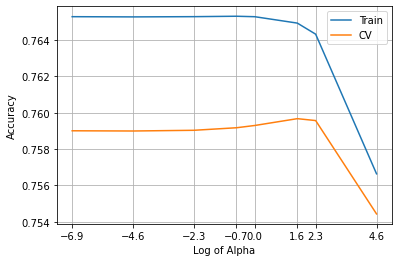

In [53]:
plt.plot(np.log(alphas),train_scores,label= "Train")
plt.plot(np.log(alphas),cv_scores,label="CV")
plt.grid(True)
plt.xticks(np.log(alphas))
plt.legend()
plt.xlabel("Log of Alpha")
plt.ylabel("Accuracy")
plt.show()

In [42]:
alphas

[0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]

In [43]:
cv_scores

[0.7590089285714285,
 0.7589970238095238,
 0.7590357142857143,
 0.7591755952380952,
 0.7593005952380952,
 0.7596755952380952,
 0.7595714285714286,
 0.7544345238095238]

In [44]:
index_of_best_score = np.argmax(cv_scores)

In [45]:
best_alpha = alphas[index_of_best_score]

In [46]:
model = MultinomialNB(alpha = best_alpha)
model.fit(X_train_vec,y_train)
model.score(X_test_vec,y_test)

0.7603375

In [47]:
print("training score: ",model.score(X_train_vec,y_train))
print("validation score:",model.score(X_cv_vec,y_cv))
print("testing score:",model.score(X_test_vec,y_test))

training score:  0.7649336734693878
validation score: 0.7596755952380952
testing score: 0.7603375


In [48]:
col=["train","CV","test"]
index=[]
train=[]
cv=[]
test=[]


In [49]:
index.append("count_multi")
train.append(model.score(X_train_vec,y_train))
cv.append(model.score(X_cv_vec,y_cv))
test.append(model.score(X_test_vec,y_test))

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec,y_train)
lr.score(X_train_vec,y_train)
lr.score(X_cv_vec,y_cv)

0.7683630952380952

In [51]:
index.append("count_LR")
train.append(lr.score(X_train_vec,y_train))
cv.append(lr.score(X_cv_vec,y_cv))
test.append(lr.score(X_test_vec,y_test))

In [52]:
lr.score(X_test_vec,y_test)

0.76810625

In [55]:
from sklearn.feature_extraction.text import iTfidfVectorzer
tf_idf=TfidfVectorizer(max_features=20000)
x_train_tf_idf = tf_idf.fit_transform(X_train)

In [56]:
x_test_tf_idf = tf_idf.transform(X_test)

In [57]:
x_cv_tf_idf = tf_idf.transform(X_cv)

In [58]:
x_train_tf_idf.shape,x_test_tf_idf.shape,x_cv_tf_idf.shape

((784000, 20000), (480000, 20000), (336000, 20000))

In [59]:
alphas=[0,0.5,1,5,10,20,50,100]
cv_scores=[]
train_scores=[]
for a in alphas:
    model=MultinomialNB(alpha=a)
    model.fit(x_train_tf_idf,y_train)
    train_scores.append(model.score(x_train_tf_idf,y_train))
    cv_scores.append(model.score(x_cv_tf_idf,y_cv))
print(cv_scores,train_scores)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[0.7711011904761905, 0.7720744047619048, 0.7725952380952381, 0.7751190476190476, 0.7759642857142857, 0.7762470238095238, 0.7747886904761905, 0.7715982142857143] [0.780219387755102, 0.7806823979591837, 0.7808584183673469, 0.7815892857142858, 0.7816326530612245, 0.7806224489795919, 0.7774017857142858, 0.7731313775510205]


<ipython-input-60-7f6f95cf2d1b>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(alphas),cv_scores,label="cv")
<ipython-input-60-7f6f95cf2d1b>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(alphas),train_scores,label="train")


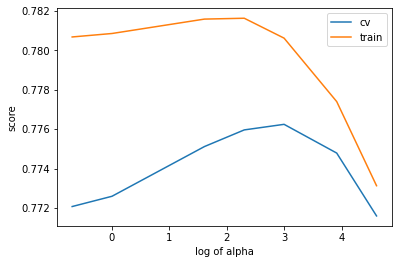

In [60]:
plt.plot(np.log(alphas),cv_scores,label="cv")
plt.plot(np.log(alphas),train_scores,label="train")
plt.legend()
plt.xlabel("log of alpha")
plt.ylabel("score")
plt.show()

In [61]:
best_score_index=np.argmax(cv_scores)
best_score_index

5

In [62]:
best_alpha=alphas[best_score_index]
best_alpha

20

In [63]:
model2 = MultinomialNB(alpha = best_alpha)
model2.fit(x_train_tf_idf,y_train)
model2.score(x_test_tf_idf,y_test)

0.7764104166666667

In [64]:
print("training score: ",model2.score(x_train_tf_idf,y_train))
print("validation score:",model2.score(x_cv_tf_idf,y_cv))
print("testing score:",model2.score(x_test_tf_idf,y_test))

training score:  0.7806224489795919
validation score: 0.7762470238095238
testing score: 0.7764104166666667


In [65]:
index.append("tfidf_multi")
train.append(model2.score(x_train_tf_idf,y_train))
cv.append(model2.score(x_cv_tf_idf,y_cv))
test.append(model2.score(x_test_tf_idf,y_test))

In [66]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(max_iter=1000)
lr2.fit(x_train_tf_idf,y_train)
print("training score: ",lr2.score(x_train_tf_idf,y_train))
print("validation score:",lr2.score(x_cv_tf_idf,y_cv))
print("testing score:",lr2.score(x_test_tf_idf,y_test))

training score:  0.8050535714285715
validation score: 0.7975535714285714
testing score: 0.7964729166666666


In [67]:
index.append("tfidf_LR")
train.append(lr2.score(x_train_tf_idf,y_train))
cv.append(lr2.score(x_cv_tf_idf,y_cv))
test.append(lr2.score(x_test_tf_idf,y_test))

In [68]:
count_vec=CountVectorizer(ngram_range=(1,2),max_features=15000)
x_train_biagram=count_vec.fit_transform(X_train)
x_cv_biagram=count_vec.transform(X_cv)
x_test_biagram=count_vec.transform(X_test)

In [69]:
x_train_biagram.shape,x_cv_biagram.shape,x_test_biagram.shape

((784000, 15000), (336000, 15000), (480000, 15000))

In [70]:
alphas=[0,0.1,0.5,1,2,5,10,50,100]
train_biagram_scores=[]
cv_biagram_scores=[]
for a in alphas:
    model=MultinomialNB(alpha=a)
    model.fit(x_train_biagram,y_train)
    train_biagram_scores.append(model.score(x_train_biagram,y_train))
    cv_biagram_scores.append(model.score(x_cv_biagram,y_cv))
print(train_biagram_scores,cv_biagram_scores)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[0.7863392857142857, 0.7863073979591837, 0.7862678571428572, 0.7862002551020408, 0.7861058673469388, 0.7856887755102041, 0.785311224489796, 0.7821275510204082, 0.7789770408163266] [0.7840446428571428, 0.7840386904761905, 0.7840059523809524, 0.7839880952380952, 0.7838541666666666, 0.7837708333333333, 0.7835654761904762, 0.7808601190476191, 0.7780714285714285]


<ipython-input-71-b19561c0d518>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(alphas),cv_biagram_scores,label="cv")
<ipython-input-71-b19561c0d518>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(alphas),train_biagram_scores,label="train")


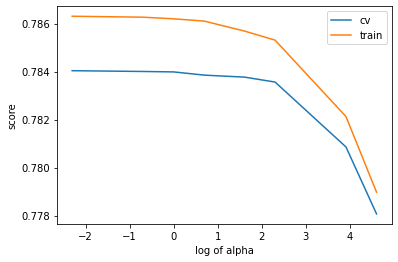

In [71]:
plt.plot(np.log(alphas),cv_biagram_scores,label="cv")
plt.plot(np.log(alphas),train_biagram_scores,label="train")
plt.legend()
plt.xlabel("log of alpha")
plt.ylabel("score")
plt.show()

In [72]:
best_biagram_cv_scores=np.argmax(cv_biagram_scores)
best_biagram_cv_scores

0

In [73]:
best_alpha_biagram_scores=alphas[best_biagram_cv_scores]
best_alpha_biagram_scores

0

In [74]:
biagram=MultinomialNB(alpha=best_alpha_biagram_scores)
biagram.fit(x_train_biagram,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


MultinomialNB(alpha=0)

In [75]:
print("testing score", biagram.score(x_test_biagram,y_test))
print("training score",biagram.score(x_train_biagram,y_train))

testing score 0.7839708333333333
training score 0.7863392857142857


In [76]:
print("training score: ",biagram.score(x_train_biagram,y_train))
print("validation score:",biagram.score(x_cv_biagram,y_cv))
print("testing score:",biagram.score(x_test_biagram,y_test))

training score:  0.7863392857142857
validation score: 0.7840446428571428
testing score: 0.7839708333333333


In [77]:
index.append("bigram_multi")
train.append(biagram.score(x_train_biagram,y_train))
cv.append(biagram.score(x_cv_biagram,y_cv))
test.append(biagram.score(x_test_biagram,y_test))

In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_biagram,y_train)
print("training score: ",lr.score(x_train_biagram,y_train))
print("validation score:",lr.score(x_cv_biagram,y_cv))
print("testing score:",lr.score(x_test_biagram,y_test))

training score:  0.8151530612244898
validation score: 0.8075684523809524
testing score: 0.806575


In [79]:
index.append("bigram_LR")
train.append(lr.score(x_train_biagram,y_train))
cv.append(lr.score(x_cv_biagram,y_cv))
test.append(lr.score(x_test_biagram,y_test))

In [80]:
count_vec=CountVectorizer(ngram_range=(1,3),max_features=15000)
x_train_trigram=count_vec.fit_transform(X_train)
x_cv_trigram=count_vec.transform(X_cv)
x_test_trigram=count_vec.transform(X_test)

In [81]:
x_train_trigram.shape,x_cv_trigram.shape,x_test_trigram.shape

((784000, 15000), (336000, 15000), (480000, 15000))

In [82]:
alphas=[0,0.1,0.5,1,2,5,10,50,100]
train_trigram_scores=[]
cv_trigram_scores=[]
for a in alphas:
    model=MultinomialNB(alpha=a)
    model.fit(x_train_trigram,y_train)
    train_trigram_scores.append(model.score(x_train_trigram,y_train))
    cv_trigram_scores.append(model.score(x_cv_trigram,y_cv))
print(train_trigram_scores,cv_trigram_scores)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[0.7834132653061224, 0.7834017857142858, 0.7833698979591837, 0.7833150510204082, 0.7832653061224489, 0.7830471938775511, 0.7826823979591837, 0.7801747448979592, 0.7775114795918368] [0.7813065476190476, 0.7812916666666667, 0.7812291666666666, 0.7812619047619047, 0.7812142857142857, 0.7810803571428572, 0.7809464285714286, 0.7788839285714285, 0.7765863095238095]


In [83]:
best_trigram_cv_scores=np.argmax(cv_trigram_scores)
best_trigram_cv_scores

0

In [84]:
best_alpha_trigram_scores=alphas[best_trigram_cv_scores]
best_alpha_trigram_scores

0

In [85]:
trigram=MultinomialNB(alpha=best_alpha_trigram_scores)
trigram.fit(x_train_trigram,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


MultinomialNB(alpha=0)

In [86]:
print("testing score", trigram.score(x_test_trigram,y_test))
print("training score",trigram.score(x_train_trigram,y_train))

testing score 0.781425
training score 0.7834132653061224


In [87]:
print("training score: ",trigram.score(x_train_trigram,y_train))
print("validation score:",trigram.score(x_cv_trigram,y_cv))
print("testing score:",trigram.score(x_test_trigram,y_test))

training score:  0.7834132653061224
validation score: 0.7813065476190476
testing score: 0.781425


In [88]:
index.append("trigram_multi")
train.append(trigram.score(x_train_trigram,y_train))
cv.append(trigram.score(x_cv_trigram,y_cv))
test.append(trigram.score(x_test_trigram,y_test))

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_trigram,y_train)
print("training score: ",lr.score(x_train_trigram,y_train))
print("validation score:",lr.score(x_cv_trigram,y_cv))
print("testing score:",lr.score(x_test_trigram,y_test))

training score:  0.8148788265306123
validation score: 0.8070327380952381
testing score: 0.8062604166666667


In [90]:
index.append("trigram_LR")
train.append(lr.score(x_train_trigram,y_train))
cv.append(lr.score(x_cv_trigram,y_cv))
test.append(lr.score(x_test_trigram,y_test))

In [91]:
df=pd.DataFrame({"train":train,"CV":cv,"test":test}, index=index, columns=col)

In [92]:
df

,train,CV,test
count_multi,0.764934,0.759676,0.760337
count_LR,0.777774,0.768363,0.768106
tfidf_multi,0.780622,0.776247,0.776410
tfidf_LR,0.805054,0.797554,0.796473
bigram_multi,0.786339,0.784045,0.783971
bigram_LR,0.815153,0.807568,0.806575
trigram_multi,0.783413,0.781307,0.781425
trigram_LR,0.814879,0.807033,0.806260


In [93]:
import pickle

In [94]:
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(model,f)